In [3]:
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2

from dataset import get_dataloaders_supervised
import albumentations as A

transforms = A.Compose([A.VerticalFlip(), A.HorizontalFlip(), A.Cutout(), ToTensorV2()])
_, dataloader_train, _, dataloader_test = get_dataloaders_supervised(root='test', shuffle_seed=1, transforms=transforms)

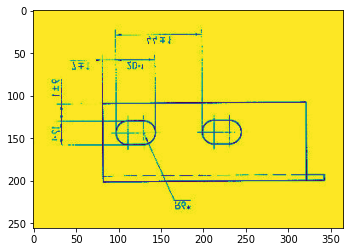

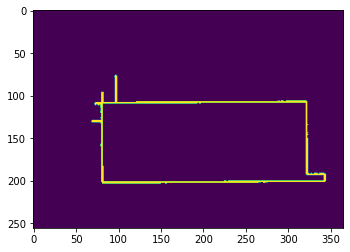

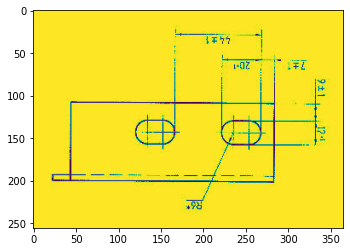

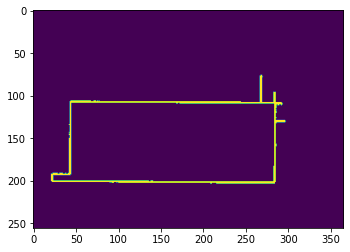

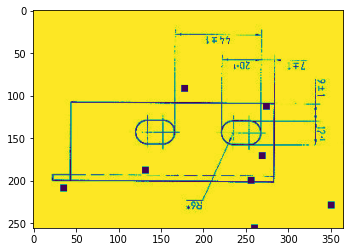

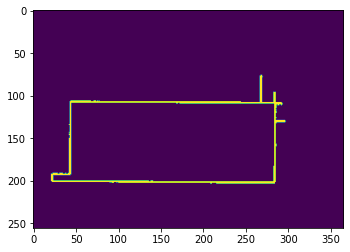

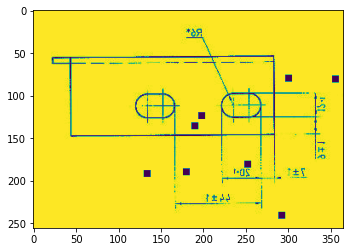

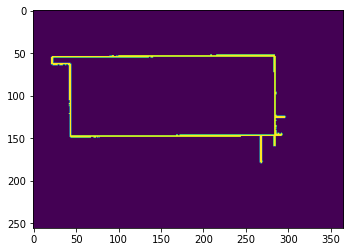

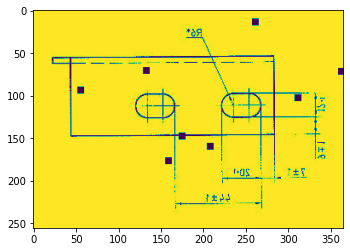

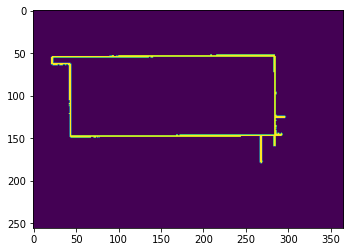

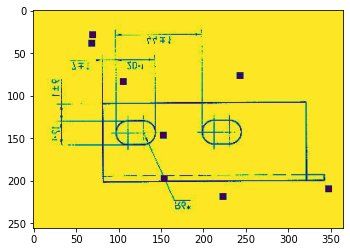

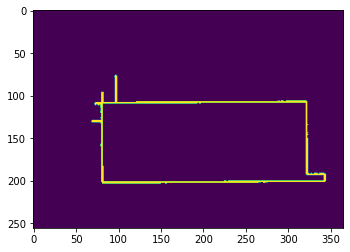

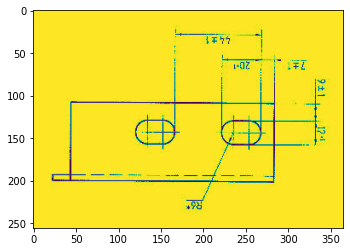

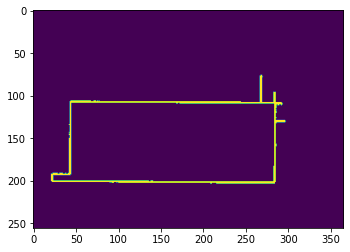

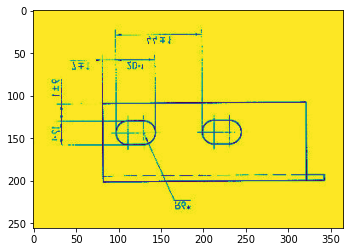

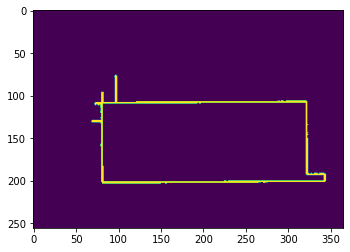

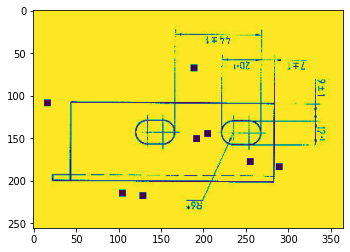

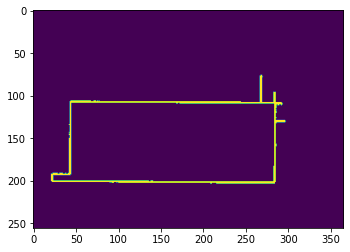

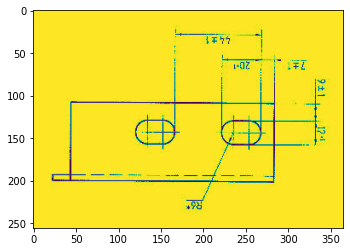

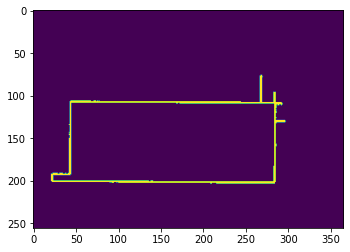

In [4]:
for epoch in range(10):
    img, mask = next(iter(dataloader_train))
    img, mask = img.squeeze().numpy(), mask.squeeze().float().numpy()

    plt.imshow(img.squeeze())
    plt.show()

    # for i in range(mask.shape[0]):
    plt.imshow(mask[0, :])
    plt.show()